In [35]:
import numpy as np
import sklearn
import scipy
import pandas
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [36]:
# 平坦
y = np.random.exponential(2,1000)
x = np.random.normal(loc=1, scale=1, size=1000)

In [91]:
# 全体的に傾向あり+方向
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000) + (y/10)

In [115]:
# 平坦 + 異常
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000)
x = np.append(x, np.random.normal(loc=1.5, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=7, scale=0.3, size=100))

In [117]:
# 全体傾向あり + 異常
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000)
x = np.append(x, np.random.normal(loc=1.5, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=7, scale=0.3, size=100))
x = x + (y/10)

In [121]:
# 平坦 + 平坦異常 相関低い
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000)
x = np.append(x, np.random.normal(loc=0, scale=1, size=100))
y = np.append(y, np.random.normal(loc=7, scale=0.3, size=100))

In [123]:
# 全体傾向あり + 逆異常 相関低い
y = np.random.exponential(2,1000)
x = np.random.normal(loc=0, scale=1, size=1000) + (y/10)
x = np.append(x, np.random.normal(loc=-1, scale=0.5, size=100))
y = np.append(y, np.random.normal(loc=7, scale=0.3, size=100))

0.0032149935321592604


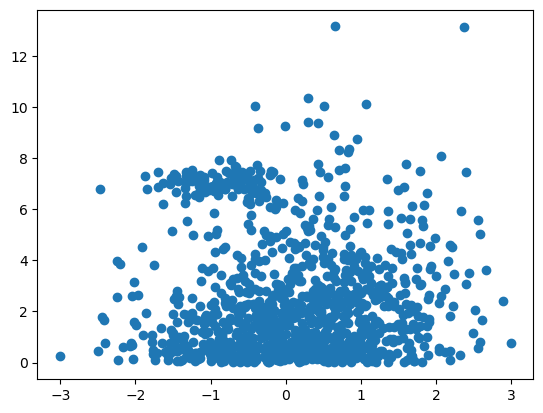

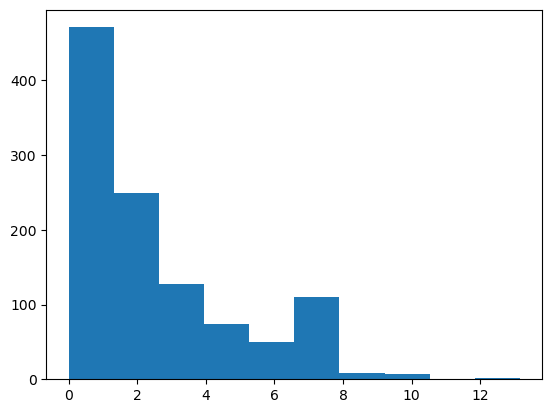

In [124]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)
print(lr.score(x.reshape(-1,1), y))
plt.scatter(x, y)
plt.show()
plt.hist(y)
plt.show()